<a href="https://colab.research.google.com/github/andresgabas/DS-Coderhouse/blob/main/Visualizaci%C3%B3n_Gab%C3%A1s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Abstract:
En este proyecto se trabajará con un dataset obtenido del sitio web www.kaggle.com.

El dataset elegido es un archivo .csv que contiene información de pacientes que sufrieron o no infartos (no se aclara la fuente)
Se hará un análisis utilizando diferentes librerías de Python, para conocer la base de datos y ver que variables se podrán utilizar para elaborar un modelo que permita predecir si una persona puede llegar a tener un infarto.

Una de las hipótesis a comprobar será si trabajar con un dataset desequilibrado, puede afectar a la predictabilidad del modelo y conducir a errores en las predicciones.

Variables incorporadas en el dataset:

ID: columna con un número que identifica a cada paciente. Se eliminará ya que no se va a utilizar.

Gender: Género, masculino, femenino u otro.

Age: Edad de los participantes del estudio.

Hypertension: Hipertenso si(1) o no (0).

Heart Disease: Enfermedad cardíaca si(1) o no (0).

Ever married: Si o no

work_type: Tipo de trabajo private, self employed, children, govt job or never worked.

Residence_type: Urbana o rural.

avg_glucose_level: Nivel de glucosa promedio.

BMI: indice de masa muscular.

smoking_status: Nunca fumó, desconocido, ex fumador, fumador.

stroke: Tuvo infarto si(1) o no (0).

El objetivo de este trabajo es probar que

In [43]:
Stroke.drop('id', axis=1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [44]:
url = 'https://raw.githubusercontent.com/andresgabas/DS-Coderhouse/main/healthcare-dataset-stroke-data.csv'
Stroke = pd.read_csv(url)


In [29]:
Stroke.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [30]:
Stroke['hypertension'].sum()

498

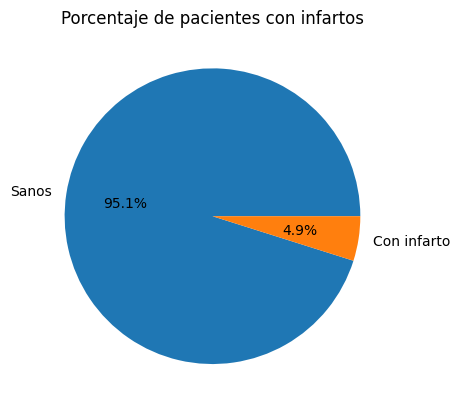

In [31]:
stroke_counts = stroke['stroke'].value_counts()
plt.pie(stroke_counts, labels=['Sanos', 'Con infarto'], autopct='%1.1f%%')
plt.title('Porcentaje de pacientes con infartos')
plt.show()


Para comenzar se analizó el porcentaje de pacientes que sufrieron un infarto. Se observa en el piechart que solo el 4.9% de los pacientes sufrieron un infarto.  

Text(0.5, 0, 'Género')

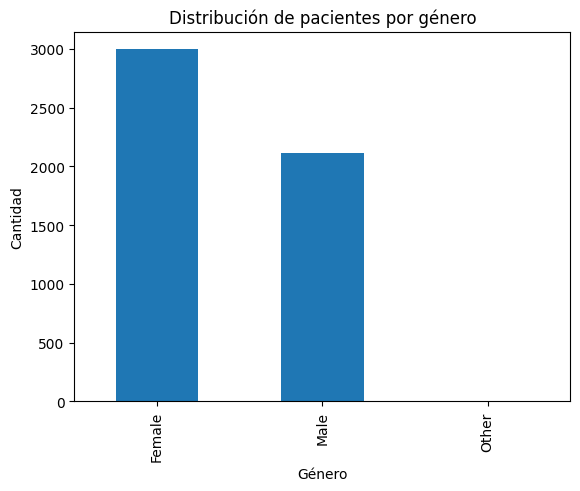

In [66]:
gender_counts = Stroke['gender'].value_counts()
ax = gender_counts.plot(kind='bar')
ax.set_title('Distribución de pacientes por género')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Género')

En este gráfico se observa que la cantidad de participantes mujeres es mayor que la hombres, esto demuestra que este es un dataset desequilibrado. Esto se tendrá en cuenta a la hora de crear el modelo para la predicción de infartos.

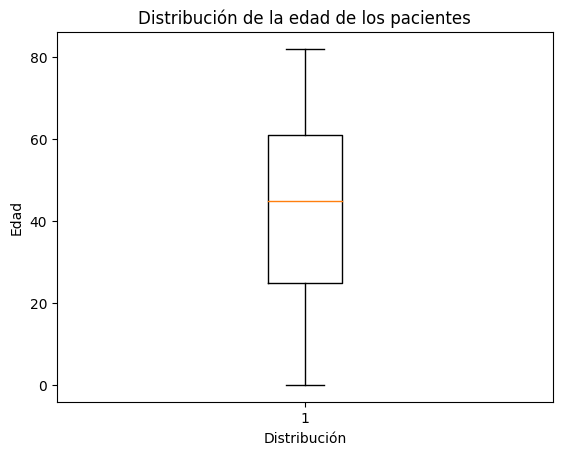

In [74]:
plt.boxplot(stroke['age'])
plt.title('Distribución de la edad de los pacientes')
plt.ylabel('Edad')
plt.xlabel('Distribución')
plt.show()

Para poder analizar la edad de los participantes, utilizo la función describe, que me da información resumida de la columna ´age´, esta información es muy útil para interpretar el Boxplot.

In [72]:
Stroke['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64